# Введение в машинное обучение

## Предварительный анализ данных

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('./data/cs-training.csv', sep=',')

In [4]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Описание данных

* SeriousDlqin2yrs - Person experienced 90 days past due delinquency or worse 
* RevolvingUtilizationOfUnsecuredLines - Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
* age - Age of borrower in years
* NumberOfTime30-59DaysPastDueNotWorse - Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
* DebtRatio - Monthly debt payments, alimony,living costs divided by monthy gross income
* MonthlyIncome - Monthly income
* NumberOfOpenCreditLinesAndLoans - Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
* NumberOfTimes90DaysLate - Number of times borrower has been 90 days or more past due.
* NumberRealEstateLoansOrLines - Number of mortgage and real estate loans including home equity lines of credit
* NumberOfTime60-89DaysPastDueNotWorse - Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
* NumberOfDependents - Number of dependents in family excluding themselves (spouse, children etc.)

* SeriousDlqin2yrs - Флаг выхода на просрочку через 90 дней
* RevolvingUtilizationOfUnsecuredLines - Общий баланс по кредитным картам и личным кредитным линиям, за исключением недвижимости, и без задолженности по кредитам, таким как автокредиты, деленные на сумму кредитных лимитов
* age - Возраст заёмщика в годах
* NumberOfTime30-59DaysPastDueNotWorse - Сколько раз заемщик просрочил выплату не более, чем на 30-59 дней, за последние 2 года.
* DebtRatio - Ежемесячные платежи по долгам, алименты и прожиточные расходы, делённые на месячный валовый доход
* MonthlyIncome - Ежемесячный доход
* NumberOfOpenCreditLinesAndLoans - Количество открытых кредитов (например, автокредит или закладная, кредитные карты и т.д.)
* NumberOfTimes90DaysLate - Сколько раз заёмщик просрочил выплату на 90 дней и более.
* NumberRealEstateLoansOrLines - Количество ипотечных кредитов и кредитов на недвижимость
* NumberOfTime60-89DaysPastDueNotWorse - Сколько раз заёмщик просрочил выплату не более, чем на 60-89 дней, за последние 2 года.
* NumberOfDependents - Количество иждивенцев в семье, исключая самого заёмщика (супруга, дети и т.д.)

## 1) Смотрим размер набора данных

см. shape

In [10]:
df.shape

(150000, 11)

## 2) Выводим названия колонок

см. columns

In [11]:
df.columns

Index([u'SeriousDlqin2yrs', u'RevolvingUtilizationOfUnsecuredLines', u'age',
       u'NumberOfTime30-59DaysPastDueNotWorse', u'DebtRatio', u'MonthlyIncome',
       u'NumberOfOpenCreditLinesAndLoans', u'NumberOfTimes90DaysLate',
       u'NumberRealEstateLoansOrLines',
       u'NumberOfTime60-89DaysPastDueNotWorse', u'NumberOfDependents'],
      dtype='object')

## 3) Смотрим информацию по каждой колонке

см. info

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


## 4) Выводим характеристики каждого признака

см. describe

In [14]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## 5) Выводим соотношение между 1 и 0 для SeriousDlqin2yrs

см. value_counts

In [18]:
df.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

## 6) Определим средний возраст

см. mean

In [19]:
df.age.mean()

52.295206666666665

## 7) Создадим свобную табличку для SeriousDlqin2yrs по признакам:
* NumberOfTime30-59DaysPastDueNotWorse 
* NumberOfTime60-89DaysPastDueNotWorse
* NumberOfTimes90DaysLate

Соберём по mean

см. pivot_table

In [33]:
df.pivot_table(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'], 'SeriousDlqin2yrs', aggfunc = 'mean')

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
SeriousDlqin2yrs,,,
0,0.280109,0.126666,0.135225
1,2.388490,1.828047,2.091362


## 8) Визуализируем распределение переменной age для SeriousDlqin2yrs

см. hist

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f05986f5c18>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f059862e278>], dtype=object)

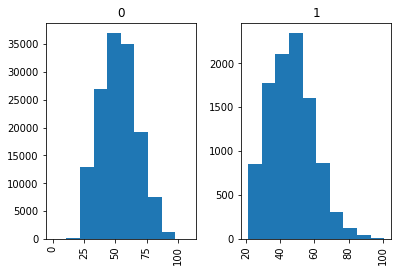

In [11]:
df.age.hist(df.SeriousDlqin2yrs)

## 9) Посмотрим на частоты признака NumberOfDependents

см. value_counts + normalize

In [39]:
df.NumberOfDependents.value_counts(normalize = True)

0.0     0.594909
1.0     0.180153
2.0     0.133643
3.0     0.064918
4.0     0.019593
5.0     0.005107
6.0     0.001082
7.0     0.000349
8.0     0.000164
9.0     0.000034
10.0    0.000034
13.0    0.000007
20.0    0.000007
Name: NumberOfDependents, dtype: float64

## 10) Узнаем максимальное значение по каждому признаку

см. apply + max

In [40]:
df.apply(max)

SeriousDlqin2yrs                              1.0
RevolvingUtilizationOfUnsecuredLines      50708.0
age                                         109.0
NumberOfTime30-59DaysPastDueNotWorse         98.0
DebtRatio                                329664.0
MonthlyIncome                           3008750.0
NumberOfOpenCreditLinesAndLoans              58.0
NumberOfTimes90DaysLate                      98.0
NumberRealEstateLoansOrLines                 54.0
NumberOfTime60-89DaysPastDueNotWorse         98.0
NumberOfDependents                           20.0
dtype: float64

## 11) Выведем ту часть таблицы, для которой значение признака age > 65

см. map + lambda

In [47]:
df[df['age'].map(lambda x: x > 65)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
15,0,0.019657,76,0,477.000000,0.0,6,0,1,0,0.0
17,0,0.061086,78,0,2058.000000,NaN,10,0,2,0,0.0
28,0,0.034421,69,0,0.042383,2500.0,17,0,0,0,1.0
38,0,1.000000,75,1,0.134078,3400.0,1,0,1,0,1.0
42,0,0.072898,81,0,75.000000,NaN,7,0,0,0,0.0
45,0,0.368876,68,0,1687.500000,1.0,31,0,1,0,0.0
46,0,0.000603,70,0,0.177787,16800.0,12,0,1,0,2.0
50,0,0.000080,70,0,0.256340,6900.0,21,1,1,0,0.0
51,0,0.818978,73,0,3095.000000,0.0,9,0,1,1,0.0


## 12) Сгруппируем таблицу по SeriousDlqin2yrs и посмотрим статистику для признаков 'RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio'

см. groupby + describe(percentiles=[])

In [19]:
new_order = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio']
df.groupby(by='SeriousDlqin2yrs')[new_order].describe(percentiles=[.5])

RevolvingUtilizationOfUnsecuredLines            age  \
SeriousDlqin2yrs                                                              
0                count                         139974.000000  139974.000000   
                 mean                               6.168855      52.751375   
                 std                              256.126350      14.791079   
                 min                                0.000000       0.000000   
                 50%                                0.133288      52.000000   
                 max                            50708.000000     109.000000   
1                count                          10026.000000   10026.000000   
                 mean                               4.367282      45.926591   
                 std                              131.835778      12.916289   
                 min                                0.000000      21.000000   
                 50%                                0.838853      45.000000   
                 max                             8328.000000     101.000000   

                            DebtRatio  
SeriousDlqin2yrs                       
0                count  139974.000000  
                 mean      357.151168  
                 std      2083.282060  
                 min         0.000000  
                 50%         0.362659  
                 max    329664.000000  
1                count   10026.000000  
                 mean      295.121066  
                 std      1238.360283  
                 min         0.000000  
                 50%         0.428227  
                 max     38793.000000

## 13) Тоже самое, только для mean, std, min, max

см. groupby + agg + [np.mean, np.std, np.min, np.max]

In [62]:
new_order = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio']
df.groupby(by='SeriousDlqin2yrs')[new_order].agg([np.mean, np.std, np.min, np.max])

RevolvingUtilizationOfUnsecuredLines                   \
                                                 mean         std amin   
SeriousDlqin2yrs                                                         
0                                            6.168855  256.126350  0.0   
1                                            4.367282  131.835778  0.0   

                                 age                        DebtRatio  \
                     amax       mean        std amin amax        mean   
SeriousDlqin2yrs                                                        
0                 50708.0  52.751375  14.791079    0  109  357.151168   
1                  8328.0  45.926591  12.916289   21  101  295.121066   

                                              
                          std amin      amax  
SeriousDlqin2yrs                              
0                 2083.282060  0.0  329664.0  
1                 1238.360283  0.0   38793.0

## 14) Построим crosstab для полей SeriousDlqin2yrs и age

см. crosstab

In [67]:
pd.crosstab(df['SeriousDlqin2yrs'],df['age'])

age,0,21,22,23,24,25,26,27,28,29,...,96,97,98,99,101,102,103,105,107,109
SeriousDlqin2yrs,,,,,,,,,,,,,,,,,,,,,
0,1,170,398,571,718,832,1046,1172,1355,1523,...,18,17,6,7,2,3,3,1,1,2
1,0,13,36,70,98,121,147,166,205,179,...,0,0,0,2,1,0,0,0,0,0


## 15) Построим crosstab для полей SeriousDlqin2yrs и age + нормализация

см. crosstab + normalize=True

In [5]:
pd.crosstab(df['SeriousDlqin2yrs'],df['age'], normalize = True)

age,0,21,22,23,24,25,26,27,28,29,...,96,97,98,99,101,102,103,105,107,109
SeriousDlqin2yrs,,,,,,,,,,,,,,,,,,,,,
0,0.000007,0.001133,0.002653,0.003807,0.004787,0.005547,0.006973,0.007813,0.009033,0.010153,...,0.00012,0.000113,0.00004,0.000047,0.000013,0.00002,0.00002,0.000007,0.000007,0.000013
1,0.000000,0.000087,0.000240,0.000467,0.000653,0.000807,0.000980,0.001107,0.001367,0.001193,...,0.00000,0.000000,0.00000,0.000013,0.000007,0.00000,0.00000,0.000000,0.000000,0.000000


# DZ 1)

In [188]:
pd.crosstab(df['NumberOfDependents'],df['age'],margins = True)

age,0,21,22,23,24,25,26,27,28,29,...,95,96,97,98,99,101,102,103,107,All
NumberOfDependents,,,,,,,,,,,,,,,,,,,,,
0.0,0,148,385,550,689,774,946,1001,1142,1195,...,33,12,11,5,5,3,2,3,1,86902
1.0,0,3,7,33,48,91,128,192,210,254,...,4,2,1,0,0,0,1,0,0,26316
2.0,1,1,2,13,19,31,56,53,114,145,...,0,0,0,0,0,0,0,0,0,19522
3.0,0,0,2,3,3,7,14,32,45,53,...,0,0,0,0,0,0,0,0,0,9483
4.0,0,0,0,0,1,5,4,4,8,14,...,0,0,0,0,0,0,0,0,0,2862
5.0,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,746
6.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,158
7.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51
8.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24


# DZ 2)

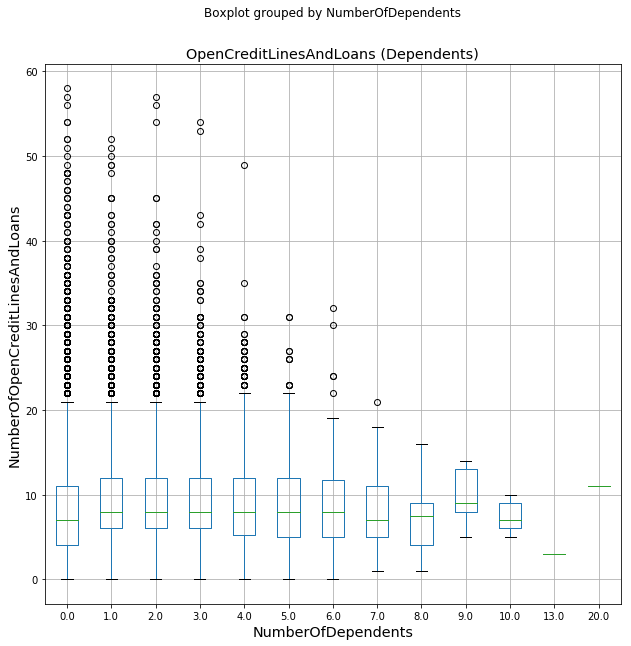

In [11]:
from matplotlib import cm

params = {'legend.fontsize': 'medium',
          'figure.figsize': (10, 10),
          'agg.path.chunksize' : 0 ,
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'}
plt.rcParams.update(params)

df.boxplot(column="NumberOfOpenCreditLinesAndLoans",by="NumberOfDependents")
plt.xlabel('NumberOfDependents')
plt.ylabel('NumberOfOpenCreditLinesAndLoans');
plt.title('OpenCreditLinesAndLoans (Dependents)')

# DZ 3)

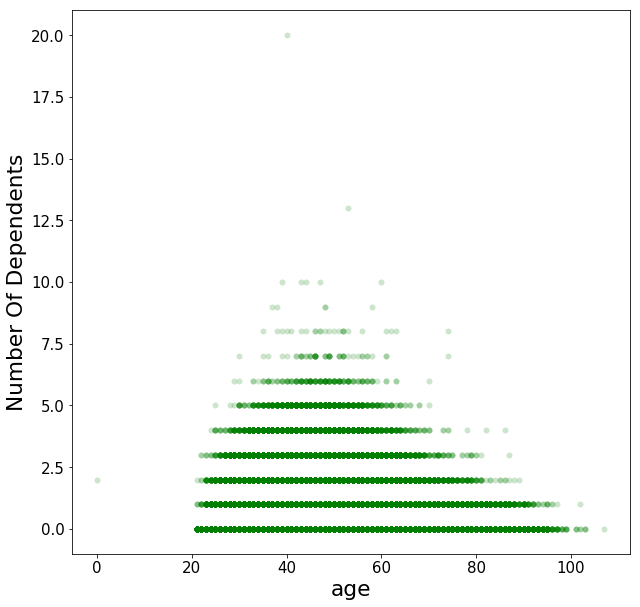

In [224]:
plt.figure()
plt.scatter(df['age'], df['NumberOfDependents'], lw=0, alpha=.2, color='g');
plt.xlabel('age')
plt.ylabel('Number Of Dependents');

# DZ 4)

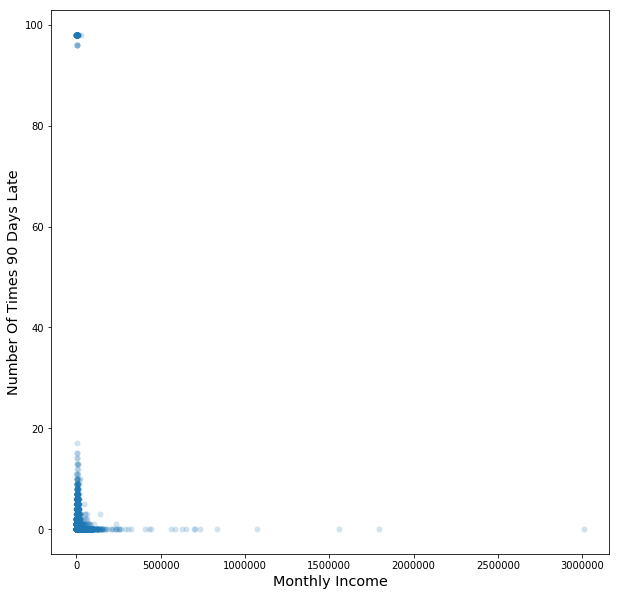

In [9]:
plt.figure()
plt.scatter(df['MonthlyIncome'], df['NumberOfTimes90DaysLate'], 
            lw=0, alpha=.2, cmap=cm.Blues, marker='o');
plt.xlabel('Monthly Income')
plt.ylabel('Number Of Times 90 Days Late');

# DZ 5)

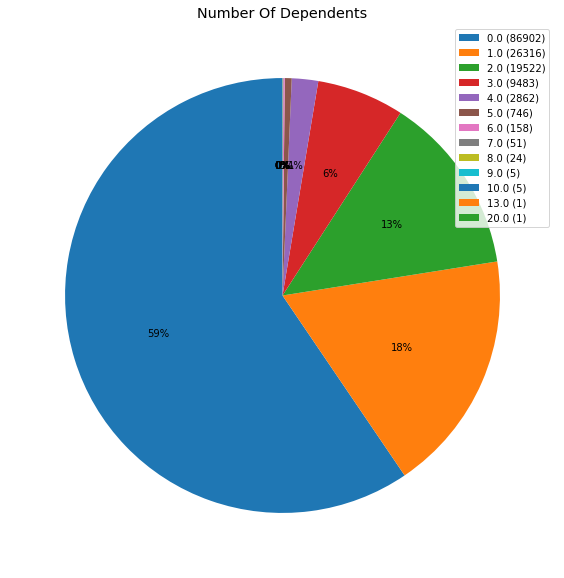

In [12]:
t = df.groupby(['NumberOfDependents']).size()
labels = df['NumberOfDependents'].unique()
labels.sort()
nlabels = []
for lb, tb in zip(labels, t):
    nlabels.append(str(lb) + str(" (") + str(tb) + str(")"))
plt.subplot(aspect=True)
patches, texts, junk = plt.pie(t.values, autopct='%i%%', startangle=90)
plt.legend(patches, nlabels, loc="best")
plt.title("Number Of Dependents")